# Logistic Regression using sklearn

### Importing required packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data file

In [33]:
df=pd.read_excel(r"/Users/shyam/Downloads/HR.xlsx") # reading HR.xlsx file

### Exploratory Data Analysis

In [34]:
df.head() # retruns the first 5 rows of data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
df.info() # returns the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [36]:
df.describe() # returns the statisctical parameters of data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [37]:
df.corr() # returns correlation between features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Investigating data set using various graphs/charts to understand how given features affect this target variable.

### Analyzing number of people left from each department

<AxesSubplot:xlabel='Department', ylabel='count'>

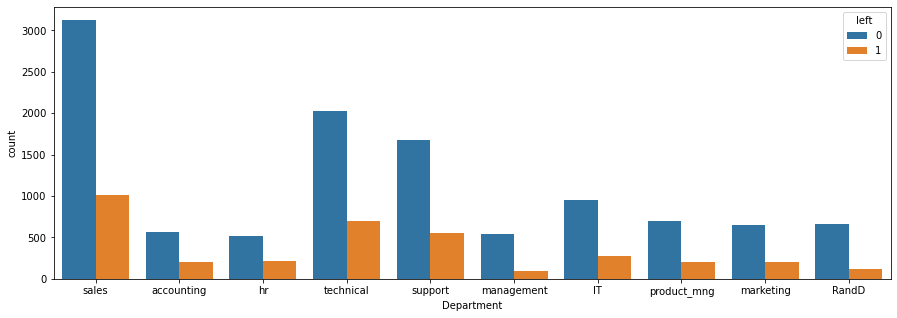

In [38]:
# Plotting Number of people left vs department using seaborn countplot
plt.figure(figsize=(15,5))
sns.countplot(x='Department', data=df,hue='left')

### Analyzing Number of People left according to their salary levels

<AxesSubplot:xlabel='salary', ylabel='count'>

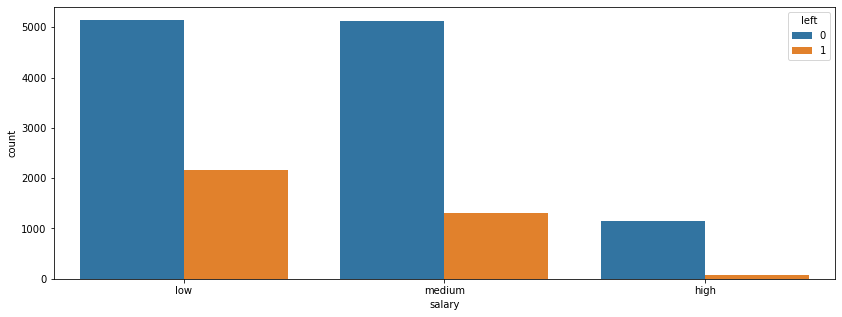

In [39]:
# Plotting Number of people left vs salary levels using seaborn countplot
plt.figure(figsize=(14,5))
sns.countplot(x='salary', data=df,hue='left')

### Analyzing Number of People left according to their satisfaction levels

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

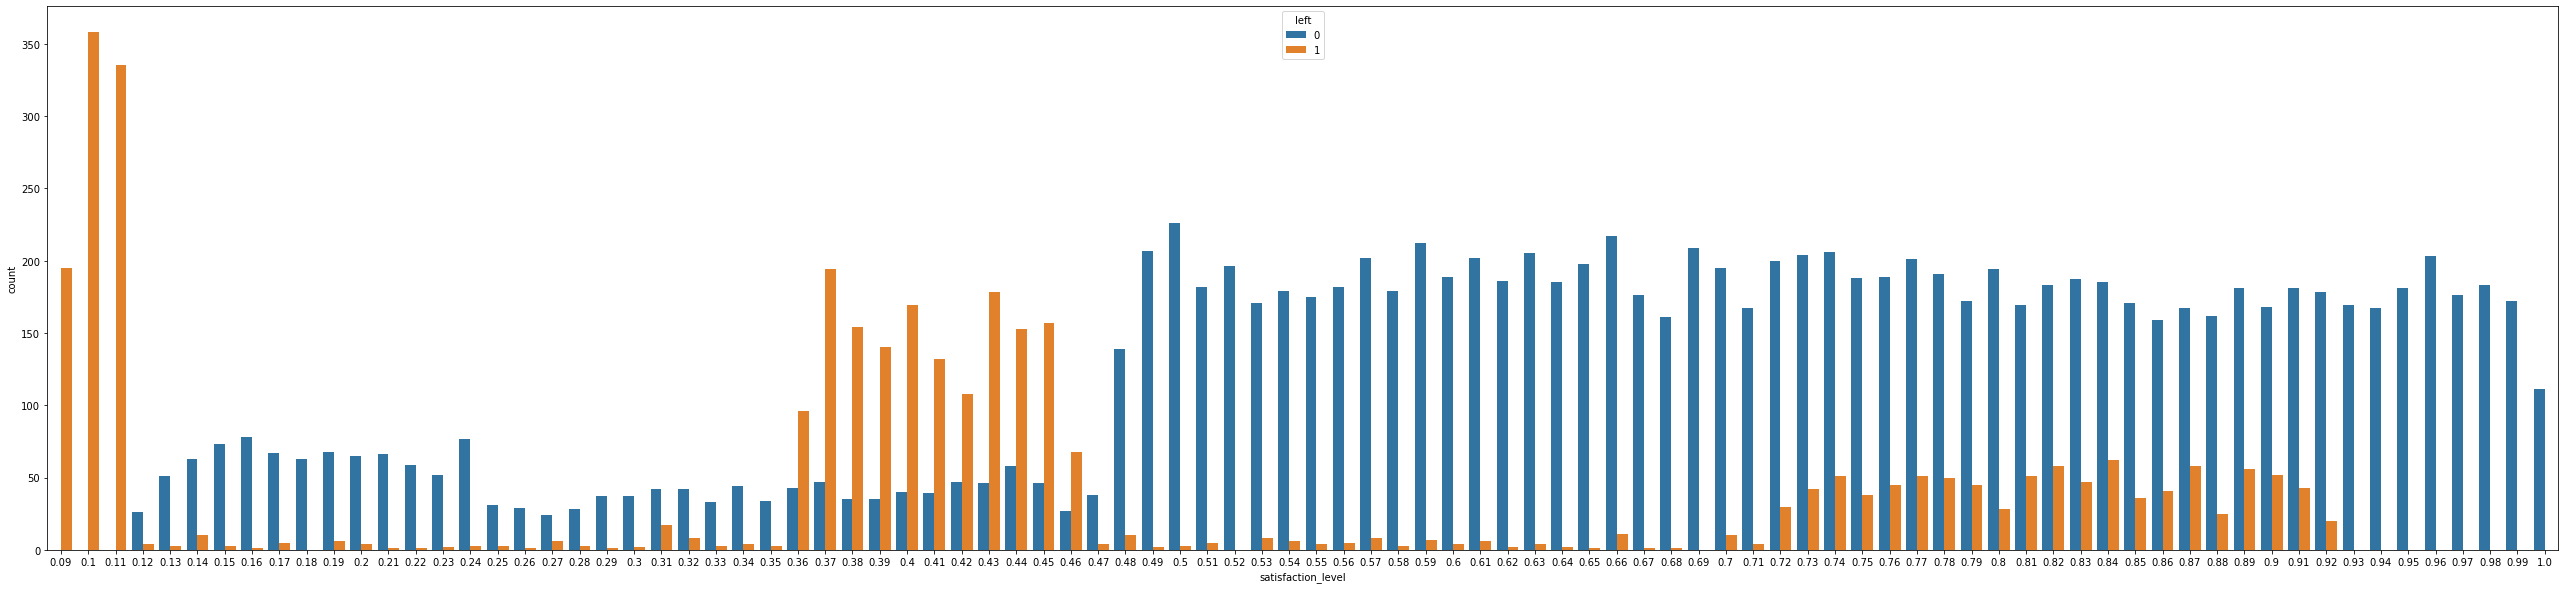

In [40]:
# Plotting Number of people left vs satisfaction levels using seaborn countplot
plt.figure(figsize=(45,10))
sns.countplot(x='satisfaction_level', data=df,hue='left')

### Analyzing Number of People left according to work accident status

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

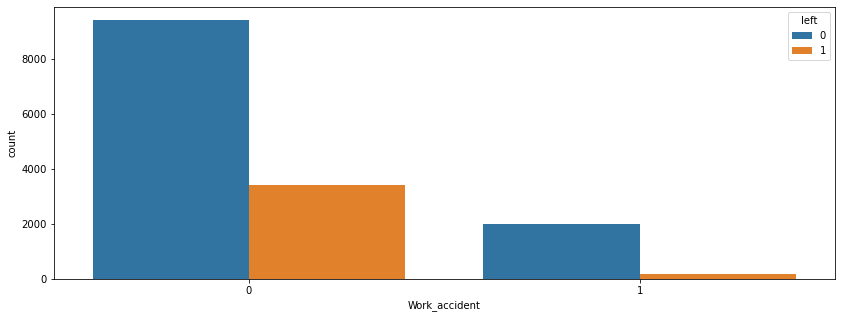

In [41]:
# Plotting Number of people left vs work accident using seaborn countplot
plt.figure(figsize=(14,5))
sns.countplot(x='Work_accident', data=df,hue='left')

### Analyzing Number of People left according to time spent at company

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

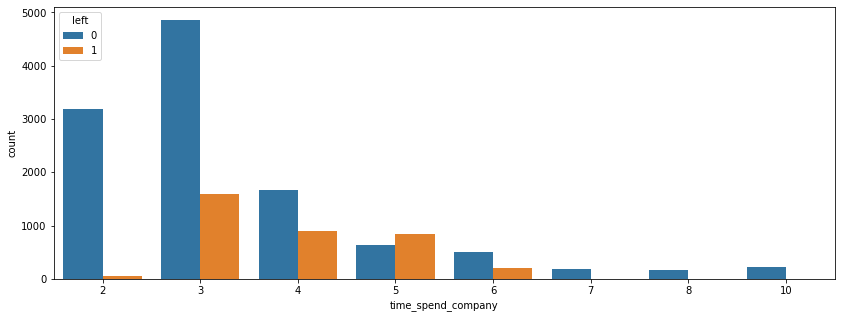

In [42]:
# Plotting Number of people left vs time spent using seaborn countplot
plt.figure(figsize=(14,5))
sns.countplot(x='time_spend_company', data=df,hue='left')

### Analyzing Number of People left according to number of projects

<AxesSubplot:xlabel='number_project', ylabel='count'>

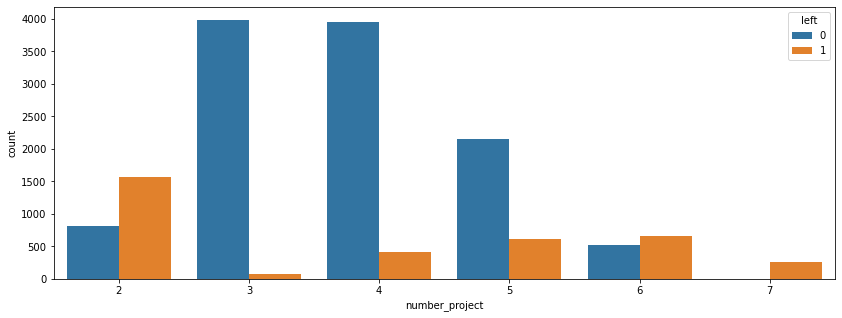

In [43]:
# Plotting Number of people left vs number of projects using seaborn countplot
plt.figure(figsize=(14,5))
sns.countplot(x='number_project', data=df,hue='left')

### Analyzing Number of People left according to promotion last 5 years

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

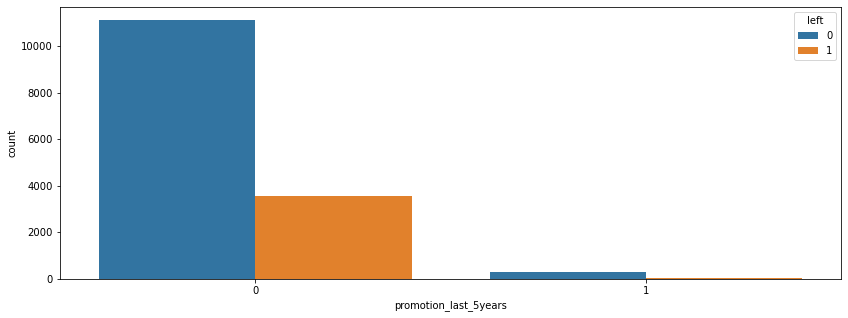

In [44]:
# Plotting Number of people left vs promotion using seaborn countplot
plt.figure(figsize=(14,5))
sns.countplot(x='promotion_last_5years', data=df,hue='left')

##  Choose several features and build thesklearnlogistic regression model predicting thetarget variable ”left”

### Importing required modules for Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler

### Seperating features and labels into X and Y to train the model

In [46]:
# Choosing some columns as features based on Data Analysis and visualizations
X = df[['number_project','satisfaction_level','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','last_evaluation']]
y = df['left']

### Seperating Training and Testing Sets

In [47]:
# creating train and test sets with test size 0.25 and train size 0.75
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
# Scaling X train and test using Transform method
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model

In [49]:
model = LogisticRegression(max_iter=10_000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

### Performance of Model

In [50]:
model.score(X_train_scaled, y_train) # returns score of the model

0.7686905502711352

In [51]:
y_predicted = model.predict(X_test_scaled) # predicting values

### PART 2C: Using Confusion Matrix and Classification report to understand the efficiency of our model

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
c_matrix= confusion_matrix(y_test, y_predicted) # Confusion matrix for y_test and y_predict
c_matrix

array([[2627,  226],
       [ 683,  214]])

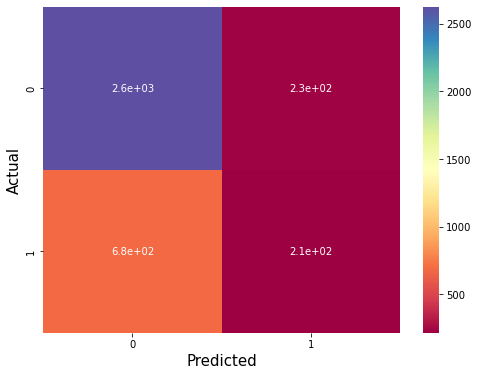

In [53]:
# Heatmap for Predicted vs Actual
plt.figure(figsize = (8,6))
sns.heatmap(c_matrix,annot=True, cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

### Classification Report

In [54]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2853
           1       0.49      0.24      0.32       897

    accuracy                           0.76      3750
   macro avg       0.64      0.58      0.59      3750
weighted avg       0.72      0.76      0.73      3750

